In [18]:
!pip install -r requirements.txt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
class_0 = np.random.randn(50, 2) + [-2, -2]  # Class 0
class_1 = np.random.randn(50, 2) + [2, 2]    # Class 1

In [4]:
X = np.vstack([class_0, class_1])  
y = np.array([0] * 50 + [1] * 50) 

In [5]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1):
        self.weights = np.random.rand(input_dim)  # weights
        self.bias = 0.0                           # bias
        self.lr = learning_rate                   # Learning rate

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return 1 if linear_output > 0 else 0

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            total_error = 0
            for i in range(len(X)):
                # Predict output
                y_pred = self.predict(X[i])
                # Update weights and bias if there's an error
                error = y[i] - y_pred
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error
                total_error += abs(error)
            # Print epoch details
            print(f"Epoch {epoch + 1}/{epochs}, Total Error: {total_error}")
            # Stop early if no errors
            if total_error == 0:
                break

In [6]:
perceptron = Perceptron(input_dim=2, learning_rate=0.1)
perceptron.train(X, y, epochs=50)

Epoch 1/50, Total Error: 0


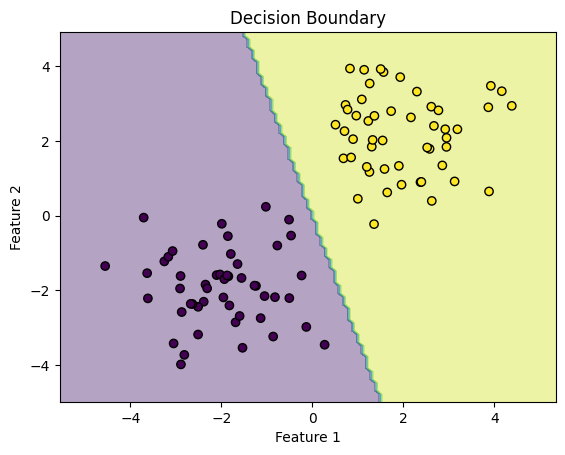

In [13]:
def plot_decision_boundary(perceptron, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([perceptron.predict(point) for point in grid])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(perceptron, X, y)
